In [6]:
import numpy as np
from influence_moo.env.env import POI, AUV, ASV, Rewards
from influence_moo.plotting import *
VISUALIZE = True

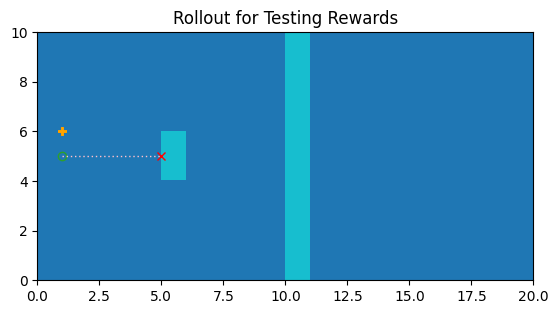

In [26]:
connectivity_grid = np.ones((20, 10))
connectivity_grid[10,:] = 0.0
connectivity_grid[5, 4:6] = 0.0

pois = [
    POI(position=np.array([1,5]), value=1.0, observation_radius=1.0)
]
poi_positions = np.array([poi.position for poi in pois])

auvs = [
    AUV(targets=[None], max_velocity=None)
]

# For tracking auvs during testing
for id, auv in enumerate(auvs):
    auv.id = id

auv0_xs = np.linspace(1.,5.,100)
auv0_ys = np.linspace(5.,5.,100)
auvs[0].path = np.array([auv0_xs, auv0_ys]).T
auvs[0].crashed = True

asvs = [
    ASV(position=None, auvs=auvs, connectivity_grid=None, policy_function=None)
]

# For tracking these asvs during testing
for id, asv in enumerate(asvs):
    asv.id = id

asv0_xs = np.linspace(1.,1.,100)
asv0_ys = np.linspace(6.,6.,100)
asvs[0].path = np.array([asv0_xs, asv0_ys]).T
asvs[0].crashed = True

if VISUALIZE:
    fig, ax = plt.subplots(1,1,dpi=100)
    plot_grid(connectivity_grid, cmap='tab10_r')
    plot_pts(poi_positions, ax, marker='o', fillstyle='none', linestyle='none',color='tab:green')
    plot_pts(auvs[0].path, ax, ls=(0, (1,2)), color='pink', lw=1)
    plot_pts(asvs[0].path, ax, marker='+', color='orange')
    # plot_pts(np.array([auvs[0].path[87]]), ax, marker='x', color='pink')
    plot_pts(np.array([[5,5]]), ax, marker='x', color='red')
    ax.set_title("Rollout for Testing Rewards")
    plt.show()

# spoof_0 = Spoof(pois, auvs, asvs, connectivity_grid, collision_step_size=0.1)

In [27]:
# Calculate rewards for that rollout
"""What if no one crashed?"""
config = {
    "rewards":
    {
        "influence_heuristic": "line_of_sight",
        "influence_type": "granular",
        "auv_reward": "difference",
        "asv_reward": "indirect_difference_team",
        "multi_reward": "single",
        "distance_threshold": 0.0
    }
}
rewards = Rewards(
    pois = pois,
    connectivity_grid = connectivity_grid,
    collision_step_size = 0.1,
    config = config
)
print("No crashes: ", rewards.compute(auvs, asvs))
"""What if the auv crashed?"""
auvs[0].crashed = True
print("AUV crashed: ", rewards.compute(auvs, asvs))
"""What if both auv and asv crashed?"""
asvs[0].crashed = True
print("Both crashed: ", rewards.compute(auvs, asvs))
"""What if only asv crashed?"""
auvs[0].crashed = False
print("ASV crashed: ", rewards.copmute())

([0], 0)
